In [1]:
from tqdm.auto import tqdm

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

np.random.seed(0)

## Let's first define a class to represent a GrabbyCiv

In [2]:
class GrabbyCiv:
    """Stores a Grabby Civilization's origin time, position, etc."""
    def __init__(self, n=10, D=1, s=1/8):
        """Create a GC with parameters:
            n: The number of hard try-try steps in the Great Filter, and correspondingly 
                the power by which civ origin probability increases with time.
            d: The dimension of space.
            s: The speed of expansion of the GC (in units of the speed of light).
        """
        self.n = n
        self.D = D
        self.v = scipy.stats.uniform.rvs(size=self.D)
        self.t = scipy.stats.uniform.rvs() ** (1 / (1 + n))
        self.s = s
        
    def L2(self, vec):
        return np.sqrt(np.sum(vec * vec))
    
    def euclidean_distance(self, other_GC):
        return self.L2(self.v - other_GC.v)
    
    def hypertorus_distance(self, other_GC):
        a = abs(self.v - other_GC.v)
        mask = a < 1/2
        diff = mask * a + (1 - mask)*(1 - a)
        return self.L2(diff)
    
    def conquers(self, other_GC):
        a = self.t + self.hypertorus_distance(other_GC) / self.s
        return other_GC.t > a
    
    def visible_angle_to(self, other_GC):
        d = self.hypertorus_distance(other_GC)
        o = other_GC.t + d
        return self.s * (self.t - o) / d
        
    def wait_until_meeting(self, other_GC):
        # TODO: generalize the equation for i and j to have different speeds
        d = self.hypertorus_distance(other_GC)
        return ((d / self.s) - (self.t - other_GC.t)) / 2
    
    def __str__(self):
        return f"({self.v}, {self.t})"
    
    def __repr__(self):
        return str(self)

## Now replicate the figure from yesterday's notebook

In [3]:
N = 10000
GCs = [GrabbyCiv(n=10, D=1, s=1/8) for _ in range(N)]

C = []
GCs.sort(key=lambda GC: GC.t) # sort by origin time, from earliest to latest
pbar = tqdm(total=N)
while GCs:
    i = GCs.pop(0)
    C.append(i) # keep youngest civ
    GCs = [j for j in GCs if not i.conquers(j)]
    pbar.n = N - len(GCs)
    pbar.refresh()

C.sort(key=lambda GC: GC.v[0]) # sort by position
print(f"{len(C)} GCs arose in our simulation")

meeting_points = []
GCs_and_meeting_points = []
for i in range(len(C) - 1):
    x0, t0 = C[i].v[0], C[i].t
    x1, t1 = C[i+1].v[0], C[i+1].t
    x = ((C[i].s*(t1 - t0)) + (x0 + x1)) / 2
    t = t0 + (x - x0)*(1/C[i].s)
    GCs_and_meeting_points.append((x0, t0))
    GCs_and_meeting_points.append((x, t))
    meeting_points.append((x, t))
GCs_and_meeting_points.append((C[-1].v[0], C[-1].t))

  0%|          | 0/10000 [00:00<?, ?it/s]

68 GCs arose in our simulation


Text(0.5, 0, 'x')

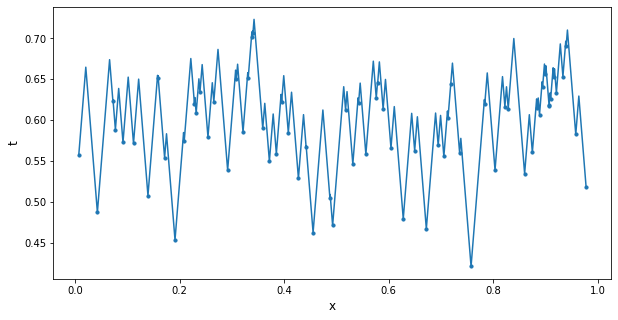

In [4]:
plt.figure(figsize=(10, 5))
xs, ts = zip(*[(GC.v[0], GC.t) for GC in C])
plt.scatter(xs, ts, s=10)
plt.plot(*zip(*GCs_and_meeting_points))
plt.ylabel("t", fontsize=12)
plt.xlabel("x", fontsize=12)

# Let's get some statistics for D=1, s=1/8, n=10, N=4000

In [5]:
N = 4000
GCs = [GrabbyCiv(n=10, D=1, s=1/8) for _ in range(N)]

C = []
GCs.sort(key=lambda GC: GC.t) # sort by origin time, from earliest to latest
pbar = tqdm(total=N)
while GCs:
    i = GCs.pop(0)
    C.append(i) # keep youngest civ
    GCs = [j for j in GCs if not i.conquers(j)]
    pbar.n = N - len(GCs)
    pbar.refresh()
    
C.sort(key=lambda GC: GC.v[0]) # sort by position
print(f"{len(C)} GCs arose in our simulation")

  0%|          | 0/4000 [00:00<?, ?it/s]

65 GCs arose in our simulation


Text(0.5, 1.0, 'Mean origin time: 0.636')

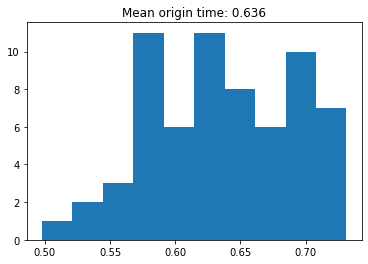

In [6]:
origin_times = [GC.t for GC in C]
_ = plt.hist(origin_times)
plt.title("Mean origin time: {:.3f}".format(np.mean(origin_times)))

Text(0.5, 1.0, 'Mean wait time: 0.034')

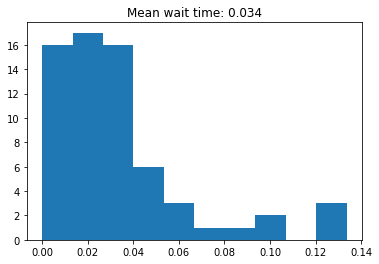

In [7]:
wait_times = [min(j.wait_until_meeting(i) for j in C if j != i) for i in C]
_ = plt.hist(wait_times)
plt.title("Mean wait time: {:.3f}".format(np.mean(wait_times)))

# Let's get some statistics for D=2, s=1/8, n=10, N=100000

In [13]:
N = 100000
GCs = [GrabbyCiv(n=10, D=2, s=1/8) for _ in range(N)]

C = []
GCs.sort(key=lambda GC: GC.t) # sort by origin time, from earliest to latest
pbar = tqdm(total=N)
while GCs:
    i = GCs.pop(0)
    C.append(i) # keep youngest civ
    GCs = [j for j in GCs if not i.conquers(j)]
    pbar.n = N - len(GCs)
    pbar.refresh()
C.sort(key=lambda GC: GC.v[0]) # sort by position
print(f"{len(C)} GCs arose in our simulation")

  0%|          | 0/100000 [00:00<?, ?it/s]

2895 GCs arose in our simulation


Text(0.5, 1.0, 'Mean origin time: 0.687')

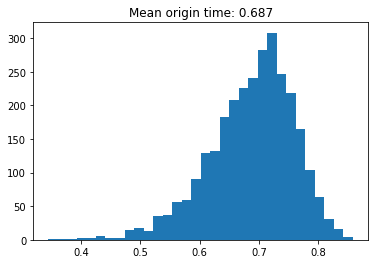

In [17]:
origin_times = [GC.t for GC in C]
_ = plt.hist(origin_times, bins=32)
plt.title("Mean origin time: {:.3f}".format(np.mean(origin_times)))

Text(0.5, 1.0, 'Mean wait time: 0.027')

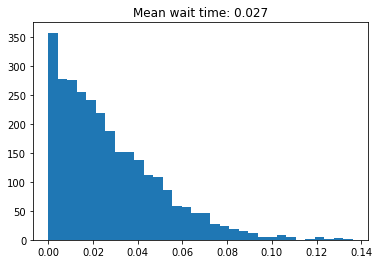

In [18]:
wait_times = [min(j.wait_until_meeting(i) for j in C if j != i) for i in C]
_ = plt.hist(wait_times, bins=32)
plt.title("Mean wait time: {:.3f}".format(np.mean(wait_times)))